# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.interpolate
import statsmodels.api as sm
import glob

In [2]:
# import sys
# sys.path.append('/content/spppy')
# import SPPPy
# import main
# import materials
# # import SPP reflection curves

# Functions

In [5]:
class ofp():
    # TM Mode
    def q_i(theta_i, n_i):
        return np.cos(theta_i / n_i)

    def Mi(k_0, n_i, z_i, theta_i):
        arr = np.array([
            [np.cos(k_0 * n_i * z_i * np.cos(theta_i)),
            0 - 1 / ofp.q_i(theta_i, n_i) * np.sin(k_0 * n_i * z_i * np.cos(theta_i)) * 1j],
         [0 - 1 / ofp.q_i(theta_i, n_i) * np.sin(k_0 * n_i * z_i * np.cos(theta_i)) * 1j,
            np.cos(k_0 * n_i * z_i * np.cos(theta_i))]
           ])
        return arr

    # reflectivity
    def Rp(rp):
        return abs(rp)**2

    # BK7
    def n_bk7(l):
        '''
        l:  lambda, wavelength
        '''
        t1 = 1.03961212 * l**2 / (l**2 - 0.00600069867)
        t2 = 0.231792344 * l**2 / (l**2 - 0.0200179144)
        t3 = 1.01046945 * l**2 / (l**2 - 103.560653)
        sl = np.sqrt(t1 + t2 + t3 + 1)
        return sl

    # dispersion relation
    def eps2(eps21, eps22):
        return eps21 + eps22

    def rp(M, qN, q1):
        """
        q1: from the first layer
        qN: from the last layer
        M: Matrix multiplication of Mi, M = np.array([[m11,m21],[m12,m22]])
        """
        m11 = M[0][0]
        m21 = M[0][1]
        m12 = M[1][0]
        m22 = M[1][1]

        return ((m11 + m12 * qN) * q1 - (m21 + m22 * qN)) / ((m11 + m12 * qN) * q1 + (m21 + m22 * qN))

    def M(M_lst):
        """
        M_lst: list with the correct position of each layer Matrix Mi
        """
        m = M_lst[0]
        for i in range(len(M_lst)-1):
            m = m @ M_lst[i+1]
            print(m)
        return m

    def delta_spp(kx_2):
        '''
        delta_spp: the propagation length of the plasmon
        kx_2: means k_x^{''}
        '''
        return 1 / (2 * kx_2)

    def vp(omega, kx_1):
        '''
        vp: phase velocity
        omega: circle frequency
        '''
        return omega / kx_1

# Data Loading

## Überblick

### Gold

In [7]:
dp = "../Oberflaechenplasmonen"
fid = os.listdir(dp)
af = sorted(glob.glob(os.path.join(dp, '*.asc')))
pd.read_csv(af[0], header=None).head()
# print(af2)

,0,1
0,461.00433,345
1,461.62930,339
2,462.25427,347
3,462.87921,323
4,463.50415,338


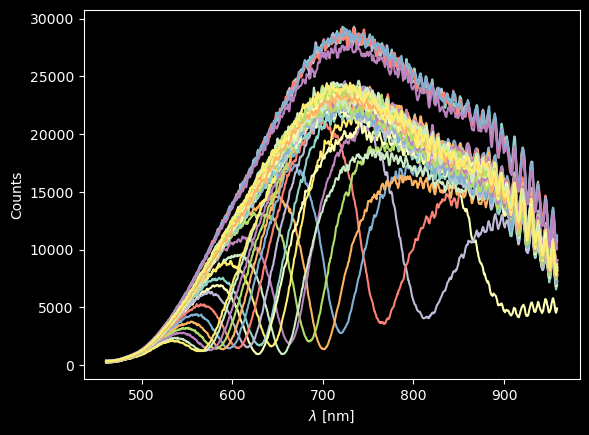

In [8]:
for i in range(len(af)):
    d = pd.read_csv(af[i], header=None)
    plt.plot(d[0], d[1], label=f'{af[i]}')
# plt.yscale('log')
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Counts')
plt.show()

In [14]:
# Gold, p-polarisiert
g_p_845 = pd.DataFrame(np.loadtxt('p845gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_850 = pd.DataFrame(np.loadtxt('p850gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_855 = pd.DataFrame(np.loadtxt('p855gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_860 = pd.DataFrame(np.loadtxt('p860gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_865 = pd.DataFrame(np.loadtxt('p865gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_870 = pd.DataFrame(np.loadtxt('p870gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_875 = pd.DataFrame(np.loadtxt('p875gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_880 = pd.DataFrame(np.loadtxt('p880gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_885 = pd.DataFrame(np.loadtxt('p885gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_890 = pd.DataFrame(np.loadtxt('p890gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_895 = pd.DataFrame(np.loadtxt('p895gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_900 = pd.DataFrame(np.loadtxt('p900gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_905 = pd.DataFrame(np.loadtxt('p905gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_910 = pd.DataFrame(np.loadtxt('p910gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_915 = pd.DataFrame(np.loadtxt('p915gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_920 = pd.DataFrame(np.loadtxt('p920gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_p_925 = pd.DataFrame(np.loadtxt('p925gold.asc',
                                  delimiter=',',encoding='latin-1'))
lst_g_p = [g_p_845, g_p_850, g_p_855, g_p_860, g_p_865, g_p_870,
           g_p_875, g_p_880, g_p_885, g_p_890,
           g_p_895, g_p_900, g_p_905, g_p_910, g_p_915, g_p_920, g_p_925]

# gold, s-polarisiert
g_s_845 = pd.DataFrame(np.loadtxt('s845gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_850 = pd.DataFrame(np.loadtxt('s850gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_855 = pd.DataFrame(np.loadtxt('s855gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_860 = pd.DataFrame(np.loadtxt('s860gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_865 = pd.DataFrame(np.loadtxt('s865gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_870 = pd.DataFrame(np.loadtxt('s870gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_875 = pd.DataFrame(np.loadtxt('s875gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_880 = pd.DataFrame(np.loadtxt('s880gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_885 = pd.DataFrame(np.loadtxt('s885gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_890 = pd.DataFrame(np.loadtxt('s890gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_895 = pd.DataFrame(np.loadtxt('s895gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_900 = pd.DataFrame(np.loadtxt('s900gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_905 = pd.DataFrame(np.loadtxt('s905gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_910 = pd.DataFrame(np.loadtxt('s910gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_915 = pd.DataFrame(np.loadtxt('s915gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_920 = pd.DataFrame(np.loadtxt('s920gold.asc',
                                  delimiter=',', encoding='latin-1'))
g_s_925 = pd.DataFrame(np.loadtxt('s925gold.asc',
                                  delimiter=',', encoding='latin-1'))
lst_g_s = [g_s_845, g_s_850, g_s_855, g_s_860, g_s_865, g_s_870, g_s_875,
           g_s_880, g_s_885, g_s_890,
           g_s_895, g_s_900, g_s_905, g_s_910, g_s_915, g_s_920, g_s_925]
print(len(lst_g_s))
print(len(lst_g_p))

17
17


In [15]:
g_s_925.head()

,0,1
0,461.00433,357.0
1,461.62930,363.0
2,462.25427,351.0
3,462.87921,345.0
4,463.50415,382.0


### $Al_2O_3$

In [16]:
ao_p870 = pd.DataFrame(np.loadtxt('p870aluoxid.asc',
                                  delimiter=',',encoding='latin-1'))
ao_s870 = pd.DataFrame(np.loadtxt('s870aluoxid.asc',
                                  delimiter=',',encoding='latin-1'))
ao_p880 = pd.DataFrame(np.loadtxt('p880aluoxid.asc',
                                  delimiter=',',encoding='latin-1'))
ao_s880 = pd.DataFrame(np.loadtxt('s880aluoxid.asc',
                                  delimiter=',',encoding='latin-1'))
ao_p890 = pd.DataFrame(np.loadtxt('p890aluoxid.asc',
                                  delimiter=',',encoding='latin-1'))
ao_s890 = pd.DataFrame(np.loadtxt('s890aluoxid.asc',
                                  delimiter=',',encoding='latin-1'))

In [17]:
# changings columns, calculating energy
ao_p870 = ao_p870.rename(columns={0: 'wl [10^-9m]', 1: 'Counts'})
ao_p870['wl [10^-9m]'] = pd.to_numeric(ao_p870['wl [10^-9m]'])
ao_p870['Counts'] = pd.to_numeric(ao_p870['Counts'])
ao_p870['wl [10^-6m]'] = ao_p870['wl [10^-9m]'] / 1e3
ao_p870['Energy [eV]'] = 1.240 / ao_p870['wl [10^-6m]']

ao_s870 = ao_s870.rename(columns={0: 'wl [10^-9m]', 1: 'Counts'})
ao_s870['wl [10^-9m]'] = pd.to_numeric(ao_s870['wl [10^-9m]'])
ao_s870['Counts'] = pd.to_numeric(ao_s870['Counts'])
ao_s870['wl [10^-6m]'] = ao_s870['wl [10^-9m]'] / 1e3
ao_s870['Energy [eV]'] = 1.240 / ao_s870['wl [10^-6m]']

ao_p880 = ao_p880.rename(columns={0: 'wl [10^-9m]', 1: 'Counts'})
ao_p880['wl [10^-9m]'] = pd.to_numeric(ao_p880['wl [10^-9m]'])
ao_p880['Counts'] = pd.to_numeric(ao_p880['Counts'])
ao_p880['wl [10^-6m]'] = ao_p880['wl [10^-9m]'] / 1e3
ao_p880['Energy [eV]'] = 1.240 / ao_p880['wl [10^-6m]']

ao_s880 = ao_s880.rename(columns={0: 'wl [10^-9m]', 1: 'Counts'})
ao_s880['wl [10^-9m]'] = pd.to_numeric(ao_s880['wl [10^-9m]'])
ao_s880['Counts'] = pd.to_numeric(ao_s880['Counts'])
ao_s880['wl [10^-6m]'] = ao_s880['wl [10^-9m]'] / 1e3
ao_s880['Energy [eV]'] = 1.240 / ao_s880['wl [10^-6m]']

ao_p890 = ao_p890.rename(columns={0: 'wl [10^-9m]', 1: 'Counts'})
ao_p890['wl [10^-9m]'] = pd.to_numeric(ao_p890['wl [10^-9m]'])
ao_p890['Counts'] = pd.to_numeric(ao_p890['Counts'])
ao_p890['wl [10^-6m]'] = ao_p890['wl [10^-9m]'] / 1e3
ao_p890['Energy [eV]'] = 1.240 / ao_p890['wl [10^-6m]']

ao_s890 = ao_s890.rename(columns={0: 'wl [10^-9m]', 1: 'Counts'})
ao_s890['wl [10^-9m]'] = pd.to_numeric(ao_s890['wl [10^-9m]'])
ao_s890['Counts'] = pd.to_numeric(ao_s890['Counts'])
ao_s890['wl [10^-6m]'] = ao_s890['wl [10^-9m]'] / 1e3
ao_s890['Energy [eV]'] = 1.240 / ao_s890['wl [10^-6m]']


## Angles

In [18]:
angles_deg = np.array([84.5,
          85.0,
          85.5,
          86.0,
          86.5,
          87.0,
          87.5,
          88.0,
          88.5,
          89.0,
          89.5,
          90.0,
          90.5,
          91.0,
          91.5,
          92.0,
          92.5])
angles_deg /= 2
radians = np.deg2rad(angles_deg)

In [19]:
radians

array([0.73740161, 0.74176493, 0.74612826, 0.75049158, 0.7548549 ,
       0.75921822, 0.76358155, 0.76794487, 0.77230819, 0.77667152,
       0.78103484, 0.78539816, 0.78976149, 0.79412481, 0.79848813,
       0.80285146, 0.80721478])

In [20]:
lst_g_s[0].head()

,0,1
0,461.00433,307.0
1,461.62930,318.0
2,462.25427,315.0
3,462.87921,314.0
4,463.50415,327.0


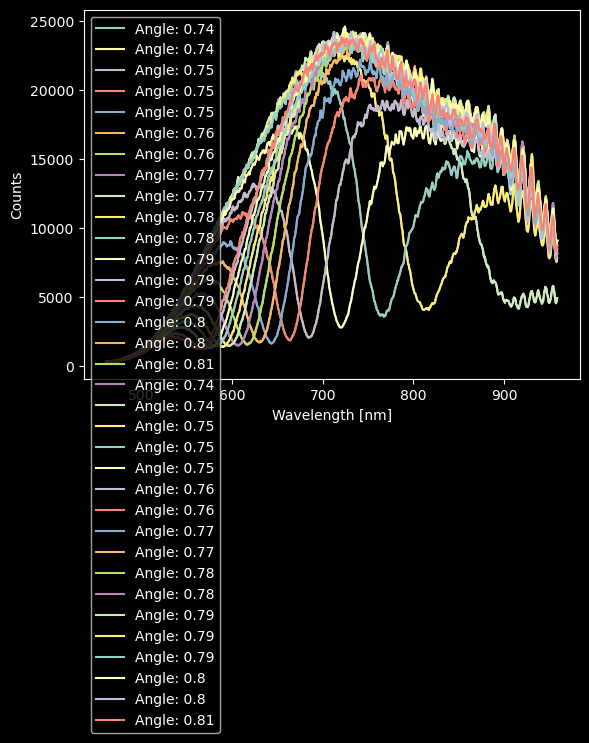

In [22]:
for i in range(len(lst_g_p)):
    plt.plot(lst_g_p[i][0], lst_g_p[i][1], label=f'Angle: {round(radians[i], 2)}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Counts')
plt.legend()
plt.show()

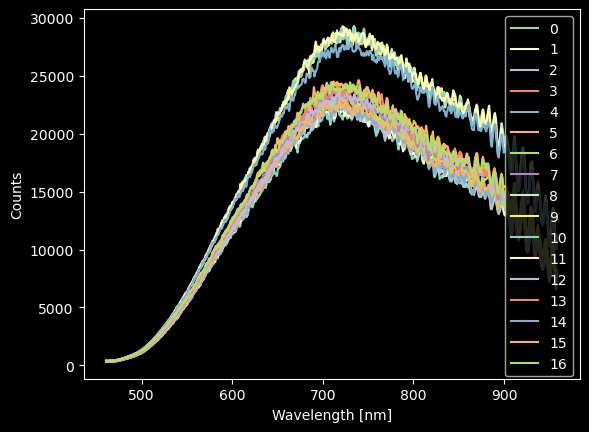

In [23]:
for i in range(len(lst_g_s)):
    plt.plot(lst_g_s[i][0], lst_g_s[i][1], label=f'{i}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [24]:
ao_angl = np.array([87.0, 88.0, 89.0])
ao_rad = np.deg2rad(ao_angl / 2)

In [25]:
ao_rad

array([0.75921822, 0.76794487, 0.77667152])

## Changing Column-Names

In [27]:
new_cols = ['wl [nm]', 'counts']
old_cols = [0, 1]

# changing cols angles
for i in range(len(lst_g_p)):
    lst_g_p[i].columns = new_cols
    lst_g_s[i].columns = new_cols
    # lst_g_p[i]['wl [10^-6m]'] = lst_g_p['wl [nm]']*1e-3
    # lst_g_s[i]['wl [10^-6m]'] = lst_g_s['wl [nm]']*1e-3

In [28]:
for i in range(len(lst_g_p)):
    lst_g_p[i]['wl [10^-6m]'] = lst_g_p[i]['wl [nm]'] * 1e-3
    lst_g_s[i]['wl [10^-6m]'] = lst_g_s[i]['wl [nm]'] * 1e-3

In [29]:
lst_g_p[0].head()

,wl [nm],counts,wl [10^-6m]
0,461.00433,345.0,0.461004
1,461.62930,339.0,0.461629
2,462.25427,347.0,0.462254
3,462.87921,323.0,0.462879
4,463.50415,338.0,0.463504


## Calculations: Energies

Equation:
$$ E [eV] = \frac{hc}{\lambda}\\ =\frac{1.240\cdot 10^{-6}\; eVm}{\lambda [nm]}$$

$$10^{-6}/10^{-9} $$

In [30]:
n = 1e-9
k = 1e-3

In [32]:
for i in range(len(lst_g_p)):
    lst_g_p[i]['E [ev]'] = 1.240 / (lst_g_p[i]['wl [nm]'] * k)
    lst_g_s[i]['E [ev]'] = 1.240 / (lst_g_s[i]['wl [nm]'] * k)

# for i in range(len(ao_angl)):
#   s_ao[i]['E [ev]'] = 1.240/(s_ao[i]['wl [nm]']*k)
#   p_ao[i]['E [ev]'] = 1.240/(p_ao[i]['wl [nm]']*k)

In [33]:
lst_g_s[0].tail()

,wl [nm],counts,wl [10^-6m],E [ev]
795,956.03082,7427.0,0.956031,1.297029
796,956.64929,6885.0,0.956649,1.296191
797,957.26776,6553.0,0.957268,1.295353
798,957.88617,6691.0,0.957886,1.294517
799,958.50464,6916.0,0.958505,1.293682


### Plots

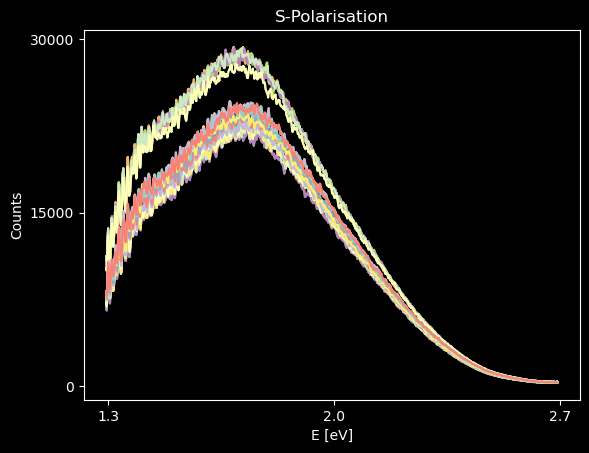

In [35]:
for i in range(len(lst_g_p)):
    plt.plot(lst_g_s[i]['E [ev]'], lst_g_s[i]['counts'], label=f'{i}')
plt.title('S-Polarisation')
plt.xlabel('E [eV]')
plt.ylabel('Counts')
plt.yticks([0, 15000, 30000])
plt.xticks([1.3, 2.0, 2.7])
# plt.legend()
plt.show()

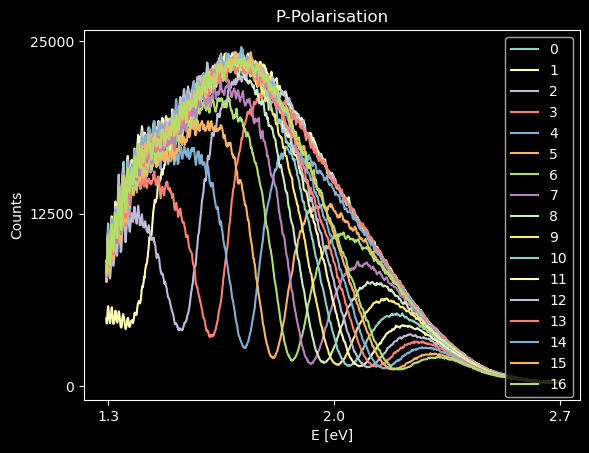

In [36]:
for i in range(len(lst_g_p)):
    plt.plot(lst_g_p[i]['E [ev]'], lst_g_p[i]['counts'], label=f'{i}')
plt.title('P-Polarisation')
plt.xlabel('E [eV]')
plt.ylabel('Counts')
plt.yticks([0, 12500, 25000])
plt.xticks([1.3, 2.0, 2.7])
plt.legend()
plt.show()

# Getting the different n for different wavelengths $\lambda$

In [37]:
# help(pd.read_csv)

## BK 7

In [40]:
# BK 7 k values
url_bk7_k = 'https://raw.githubusercontent.com/Ben-physics-dotcom/Internships/main/FPR-1/refractiveindex-infor-Data/BK7-k.txt'
bk7_k = pd.read_csv(url_bk7_k, header=None)
# comments
specs_bk7_k = bk7_k.iloc[37:]
specs_bk7_k = specs_bk7_k[0].str.split(':', expand=True)
# values
df_bk7_k = pd.DataFrame(bk7_k.iloc[11:36])[0].str.split(' ', expand=True)
df_bk7_k = df_bk7_k.drop(columns=[0, 1, 2, 3, 4, 5, 6, 7])
# new index
df_bk7_k.index = range(len(df_bk7_k))
specs_bk7_k.index = range(len(specs_bk7_k))
# renaming and from string to numeric
specs_bk7_k = specs_bk7_k.rename(columns={0: 'Text', 1: 'Values'})
df_bk7_k = df_bk7_k.rename(columns={8: 'wl [10^-6m]', 9: 'k'})
df_bk7_k['wl [10^-6m]'] = pd.to_numeric(df_bk7_k['wl [10^-6m]'])
df_bk7_k['k'] = pd.to_numeric(df_bk7_k['k'])
# both are 10^-6
df_bk7_k['energy [ev]'] = 1.240 / df_bk7_k['wl [10^-6m]']
df_bk7_k.index = range(len(df_bk7_k))
print(df_bk7_k.head())

# BK 7, n and k values
nk_url = 'https://raw.githubusercontent.com/Ben-physics-dotcom/Internships/main/FPR-1/refractiveindex-infor-Data/BK-7-n-k.csv'
bk_7_nk = pd.read_csv(nk_url, header=None)
bk_7_n = bk_7_nk.iloc[1:102]
bk_7_n = bk_7_n.rename(columns={0: 'wl [10^-6m]', 1: 'n'})
bk_7_n = bk_7_n[7:33]
# Calculating energy
bk_7_n['wl [10^-6m]'] = pd.to_numeric(bk_7_n['wl [10^-6m]'])
bk_7_n['n'] = pd.to_numeric(bk_7_n['n'])
# both are 10^-6
bk_7_n['energy [eV]'] = 1.240 / bk_7_n['wl [10^-6m]']
bk_7_n.index = range(len(bk_7_n))
bk_7_n.head()

   wl [10^-6m]             k  energy [ev]
0        0.300  2.860700e-06     4.133333
1        0.310  1.367900e-06     4.000000
2        0.320  6.660800e-07     3.875000
3        0.334  2.641500e-07     3.712575
4        0.350  9.289400e-08     3.542857


,wl [10^-6m],n,energy [eV]
0,0.454,1.524958,2.731278
1,0.476,1.523133,2.605042
2,0.498,1.521548,2.489960
3,0.520,1.520160,2.384615
4,0.542,1.518933,2.287823


In [41]:
# help(pd.read_csv)

## Gold

In [44]:
# gold, au
au_url = 'https://raw.githubusercontent.com/Ben-physics-dotcom/Internships/main/FPR-1/refractiveindex-infor-Data/au.txt'
df_au = pd.read_csv(au_url, header=None, on_bad_lines='skip')
# comments
com_au = df_au.iloc[4:7]
# data points
df_au = df_au.iloc[6:177]
# splitting into cols
df_au = df_au[0].str.split(' ', expand=True)
df_au = df_au[[8, 9, 10]]
# into numeric
df_au[8] = pd.to_numeric(df_au[8])
df_au[9] = pd.to_numeric(df_au[9])
df_au[10] = pd.to_numeric(df_au[10])
# new index
df_au.index = range(len(df_au))
# renaming
df_au = df_au.rename(columns={8: 'wl [10^-6 m]', 9: 'n', 10: 'k'})
df_au = df_au[13:68]
df_au['energy [eV]'] = 1.240 / df_au['wl [10^-6 m]']
df_au.index = range(len(df_au))
print(df_au.head())

   wl [10^-6 m]         n         k  energy [eV]
0          0.43  1.588795  2.002243     2.883721
1          0.44  1.558343  1.987345     2.818182
2          0.45  1.515997  1.961270     2.755556
3          0.46  1.455292  1.928576     2.695652
4          0.47  1.372028  1.891325     2.638298


In [45]:
print(lst_g_p[0])

       wl [nm]  counts  wl [10^-6m]    E [ev]
0    461.00433   345.0     0.461004  2.689780
1    461.62930   339.0     0.461629  2.686138
2    462.25427   347.0     0.462254  2.682506
3    462.87921   323.0     0.462879  2.678885
4    463.50415   338.0     0.463504  2.675273
..         ...     ...          ...       ...
795  956.03082  9223.0     0.956031  1.297029
796  956.64929  8684.0     0.956649  1.296191
797  957.26776  8378.0     0.957268  1.295353
798  957.88617  8475.0     0.957886  1.294517
799  958.50464  8762.0     0.958505  1.293682

[800 rows x 4 columns]


In [46]:
lst = []
for i in range(len(lst_g_p[0]) - 1):
    x1 = lst_g_p[0]['wl [nm]'][i]
    x2 = lst_g_p[0]['wl [nm]'][i + 1]
    dx = round(x2 - x1, 1)
    lst.append(dx)

In [47]:
# lst

## Aluoxid
AluOxid: $Al_2O_3$

Dispersion formula: $$ n^2-1 = \frac{1.4313493 \lambda^2}{\lambda^2−0.0726631^2}+\frac{0.65054713\lambda^2}{\lambda^2−0.1193242^2}+\frac{5.3414021\lambda^2}{\lambda^2-18.028251^2} $$

Bib Key: Zhukovsky.2015

AluOxid: Al2O3
Dispersion formula:

BibKey:

In [49]:
al2o3_url = 'https://raw.githubusercontent.com/Ben-physics-dotcom/Internships/main/FPR-1/refractiveindex-infor-Data/al2o3.txt'
df_aloxid = pd.read_csv(al2o3_url, header=None, on_bad_lines='skip')
comments_aloxid = df_aloxid.iloc[3]
df_aloxid = df_aloxid.iloc[7:707]
# splitting into cols
df_aloxid = df_aloxid[0].str.split(' ', expand=True)
df_aloxid = df_aloxid[[8, 9, 10]]
# into numeric
df_aloxid[8] = pd.to_numeric(df_aloxid[8])
df_aloxid[9] = pd.to_numeric(df_aloxid[9])
df_aloxid[10] = pd.to_numeric(df_aloxid[10])
# new index
df_aloxid.index = range(len(df_aloxid))
# renaming
df_aloxid = df_aloxid.rename(columns={8: 'wl [10^-6 m]', 9: 'n', 10: 'k'})
df_aloxid = df_aloxid[150:480]
df_aloxid['energy [eV]'] = 1.240 / df_aloxid['wl [10^-6 m]']
df_aloxid.index = range(len(df_aloxid))
df_aloxid.head()

,wl [10^-6 m],n,k,energy [eV]
0,0.447802,1.639511,0.0,2.769081
1,0.449384,1.639304,0.0,2.759333
2,0.450965,1.639099,0.0,2.749659
3,0.452547,1.638897,0.0,2.740047
4,0.454129,1.638697,0.0,2.730502


# More important Functions

In [50]:
df_au.head()

,wl [10^-6 m],n,k,energy [eV]
0,0.43,1.588795,2.002243,2.883721
1,0.44,1.558343,1.987345,2.818182
2,0.45,1.515997,1.961270,2.755556
3,0.46,1.455292,1.928576,2.695652
4,0.47,1.372028,1.891325,2.638298


In [51]:
# Sellmeier equation, third degree, useful for transparent dielectrica
def nSellmeier(wl, B1, B2, B3, C1, C2, C3):
    n = np.sqrt(1 + B1 * wl**2 / (wl**2 - C1) + B2 * wl**2 / (wl**2 - C2) + B3 * wl**2 / (wl**2 - C3))
    return complex(n)


# Air
def nAir(wl):
    n = 1
    return complex(n)


# BK7 Schott glass, p. 13
def nBK7(wl):
    n = nSellmeier(wl, 1.03961212, 0.231792344, 1.01046945, 0.00600069867, 0.0200179144, 103.560653)
    return complex(n)


# al2o3, Malitosn 1962: a-Al2O3; n(o) 0.2652-5.577 um
# Bib Key: Malitson.1962
def nAl2O3(wl):
    n = np.sqrt(1 + 1.023798 * wl**2 / (wl**2 - 0.06144821**2) + 1.058264 * wl**2 / (wl**2 - 0.1106997**2) + 5.280792 * wl**2 / (wl**2 - 17.92656**2))
    return complex(n)



# # Gold: real part
# # originally: 'Yakubovsky-53nm-n.csv'
# listn = np.genfromtxt('Yakubovsky-53nm-n.csv', delimiter=',', skip_header=1)
wln_au = df_au['wl [10^-6 m]']
n0_au = df_au['n']
n0Au = scipy.interpolate.interp1d(wln_au, n0_au)

# # Gold: imaginary part
# listkappa = np.genfromtxt('Yakubovsky-53nm-kappa.csv', delimiter=',', skip_header=1)
wlkappa = df_au['wl [10^-6 m]']
kappa0 = df_au['k']
kappa0Au = scipy.interpolate.interp1d(wlkappa, kappa0)


# Gold
def nAu(wl):
    return n0Au(wl) + 1j * kappa0Au(wl)

# With $Al_2O_3$

## Equations

In [ ]:
nIn = nBK7
n1 = nAu
# Au layer height (um)
d1 = 0.05

#bitte korrekte Schicht definieren: statt nSilica dann: Al2O3
n2 = nAl2O3
# large size for air (um)
d2 = 0.002

nOut = nAir

In [53]:
#Calculate the angles
theta1 = lambda wl, phi : np.arcsin(nIn(wl) * np.sin(phi) / n1(wl))
theta2 = lambda wl, phi : np.arcsin(nIn(wl) * np.sin(phi) / n2(wl))
thetaOut = lambda wl, phi : np.conj(np.arcsin(nIn(wl) * np.sin(phi)/nOut(wl)))

kd1 = lambda wl, phi : (2*np.pi/wl)*n1(wl)*d1*np.cos(theta1(wl,phi))
kd2 = lambda wl, phi : (2*np.pi/wl)*n2(wl)*d2*np.cos(theta2(wl,phi))

p1TE = lambda wl, phi : np.cos(theta1(wl, phi))*n1(wl)
q1TM = lambda wl, phi : np.cos(theta1(wl, phi))*1/n1(wl)
p2TE = lambda wl, phi : np.cos(theta2(wl, phi))*n2(wl)
q2TM = lambda wl, phi : np.cos(theta2(wl, phi))*1/n2(wl)
pInTE = lambda wl, phi : np.cos(phi)*nIn(wl)
qInTM = lambda wl, phi : np.cos(phi)*1/nIn(wl)
pOutTE = lambda wl, phi : np.cos(thetaOut(wl, phi))*nOut(wl)
qOutTM = lambda wl, phi : np.cos(thetaOut(wl, phi))*1/nOut(wl)

#Calculate Transfer Matrix for 2 Layer system
M1TE = lambda wl, phi : np.array([[np.cos(kd1(wl, phi)), -1j/p1TE(wl, phi)*np.sin(kd1(wl, phi))],
                                 [-1j*p1TE(wl, phi) * np.sin(kd1(wl, phi)), np.cos(kd1(wl, phi))]])
M1TM = lambda wl, phi : np.array([[np.cos(kd1(wl, phi)), -1j/q1TM(wl, phi)*np.sin(kd1(wl, phi))],
                                 [-1j*q1TM(wl, phi) * np.sin(kd1(wl, phi)), np.cos(kd1(wl, phi))]])
M2TE = lambda wl, phi : np.array([[np.cos(kd2(wl, phi)), -1j/p2TE(wl, phi)*np.sin(kd2(wl, phi))],
                                 [-1j*p2TE(wl, phi) * np.sin(kd2(wl, phi)), np.cos(kd2(wl, phi))]])
M2TM = lambda wl, phi : np.array([[np.cos(kd2(wl, phi)), -1j/q2TM(wl, phi)*np.sin(kd2(wl, phi))],
                                 [-1j*q2TM(wl, phi) * np.sin(kd2(wl, phi)), np.cos(kd2(wl, phi))]])

#Calculate final matrix
mTE = lambda wl, phi : np.matmul(M1TE(wl, phi),M2TE(wl, phi))
mTM = lambda wl, phi : np.matmul(M1TM(wl, phi),M2TM(wl, phi))

#TE mode
tTE = lambda wl, phi : 2*pInTE(wl, phi)/( (mTE(wl, phi)[0][0] + mTE(wl, phi)[0][1]*pOutTE(wl, phi))*pInTE(wl, phi)
                       + (mTE(wl, phi)[1][0] + mTE(wl, phi)[1][1]*pOutTE(wl, phi)))
TransTE = lambda wl, phi : pOutTE(wl, phi)/pInTE(wl, phi)*np.abs(tTE(wl, phi))**2
rTE = lambda wl, phi : ((mTE(wl,phi)[0][0] + mTE(wl, phi)[0][1]*pOutTE(wl, phi))*pInTE(wl, phi)-
                       (mTE(wl, phi)[1][0] + mTE(wl, phi)[1][1]* pOutTE(wl, phi)))/(
                       (mTE(wl,phi)[0][0] + mTE(wl, phi)[0][1]*pOutTE(wl, phi))*pInTE(wl, phi) +
                       (mTE(wl, phi)[1][0] + mTE(wl, phi)[1][1]* pOutTE(wl, phi)))
ReflTE = lambda wl, phi : np.abs(rTE(wl, phi))**2

#TM mode
tTM = lambda wl, phi : 2*qInTM(wl, phi)/((mTM(wl, phi)[0][0] + mTM(wl, phi)[0][1]*qOutTM(wl, phi))* qInTM(wl, phi) +
                       (mTM(wl, phi)[1][0] + mTM(wl, phi)[1][1]*qOutTM(wl, phi)))
TransTM = lambda wl, phi : qOutTM(wl, phi)/qInTM(wl, phi)*np.abs(tTM(wl, phi))**2
rTM = lambda wl, phi : ((mTM(wl, phi)[0][0] + mTM(wl, phi)[0][1]*qOutTM(wl, phi))* qInTM(wl, phi) -
                       (mTM(wl, phi)[1][0] + mTM(wl, phi)[1][1]*qOutTM(wl,phi)))/((mTM(wl,phi)[0][0] +
                       mTM(wl, phi)[0][1]*qOutTM(wl,phi))*qInTM(wl,phi) +
                       (mTM(wl,phi)[1][0] + mTM(wl,phi)[1][1]*qOutTM(wl,phi)))
ReflTM = lambda wl, phi : np.abs(rTM(wl, phi))**2

RpRs = lambda wl, phi : ReflTM(wl, phi)/ReflTE(wl, phi)

## Calculations

In [54]:
def calc(dataframe_of_wl,angle):
    lst = []
    for i in range(len(dataframe_of_wl)):
        x = RpRs(dataframe_of_wl[i],angle)
        lst.append(x)
    return np.array(lst)

In [55]:
ao_p890.head()

,wl [10^-9m],Counts,wl [10^-6m],Energy [eV]
0,461.00433,245.0,0.461004,2.689780
1,461.62930,238.0,0.461629,2.686138
2,462.25427,236.0,0.462254,2.682506
3,462.87921,249.0,0.462879,2.678885
4,463.50415,261.0,0.463504,2.675273


In [56]:
RpRs_ao_870 = calc(ao_p870['wl [10^-6m]'], ao_rad[0])
RpRs_ao_880 = calc(ao_p880['wl [10^-6m]'], ao_rad[1])
RpRs_ao_890 = calc(ao_p890['wl [10^-6m]'], ao_rad[2])

In [ ]:
# RpRs_ao_870s = calc(ao_s870['wl [10^-6m]'],ao_rad[0])
# RpRs_ao_880s = calc(ao_s880['wl [10^-6m]'],ao_rad[1])
# RpRs_ao_890s = calc(ao_s890['wl [10^-6m]'],ao_rad[2])

In [57]:
min(ao_p870['Energy [eV]'])

1.2936817916708259

In [58]:
max(ao_p870['Energy [eV]'])

2.68977950814475

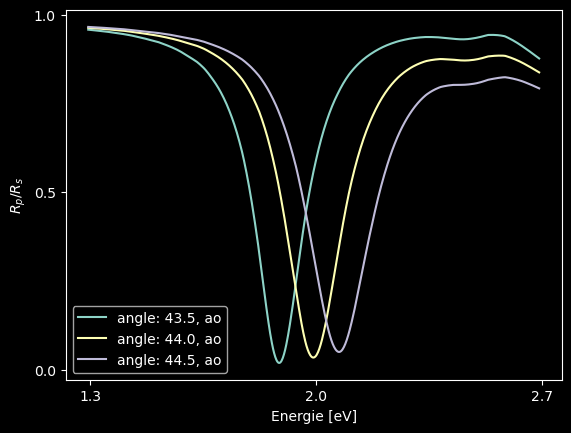

In [61]:
plt.plot(ao_p870['Energy [eV]'], RpRs_ao_870, label=f'angle: {87 / 2}, ao')
plt.plot(ao_p880['Energy [eV]'], RpRs_ao_880, label=f'angle: {88 / 2}, ao')
plt.plot(ao_p890['Energy [eV]'], RpRs_ao_890, label=f'angle: {89 / 2}, ao')
plt.xticks([1.3, 2.0, 2.7])
plt.yticks([0, 0.5, 1])
plt.xlabel('Energie [eV]')
plt.ylabel('$R_p/R_s$')
plt.legend()
plt.show()

In [62]:
# plt.plot(ao_p870['Energy [eV]'],RpRs_ao_870s,label=f'angle: {87/2}, ao')
# plt.plot(ao_p880['Energy [eV]'],RpRs_ao_880s,label=f'angle: {88/2}, ao')
# plt.plot(ao_p890['Energy [eV]'],RpRs_ao_890s,label=f'angle: {89/2}, ao')
# plt.xticks([1.3,2.0,2.7])
# plt.yticks([0,0.5,1])
# plt.xlabel('Energie [eV]')
# plt.ylabel('$R_p/R_s$')

In [63]:
ao_rad

array([0.75921822, 0.76794487, 0.77667152])

# Without $Al_2O_3$

## equations

In [64]:
nIn = nBK7
n1 = nAu
# Au layer height (um)
d1 = 0.05

nOut = nAir

In [65]:
#Calculate the angles
theta1 = lambda wl, phi : np.arcsin(nIn(wl) * np.sin(phi)/ n1(wl))
thetaOut = lambda wl, phi : np.conj(np.arcsin(nIn(wl) * np.sin(phi)/nOut(wl)))

kd1 = lambda wl, phi : (2*np.pi/wl)*n1(wl)*d1*np.cos(theta1(wl,phi))

p1TE = lambda wl, phi : np.cos(theta1(wl, phi))*n1(wl)
q1TM = lambda wl, phi : np.cos(theta1(wl, phi))*1/n1(wl)
pInTE = lambda wl, phi : np.cos(phi)*nIn(wl)
qInTM = lambda wl, phi : np.cos(phi)*1/nIn(wl)
pOutTE = lambda wl, phi : np.cos(thetaOut(wl, phi))*nOut(wl)
qOutTM = lambda wl, phi : np.cos(thetaOut(wl, phi))*1/nOut(wl)

#Calculate Transfer Matrix for 2 Layer system
M1TE = lambda wl, phi : np.array([[np.cos(kd1(wl, phi)), -1j/p1TE(wl, phi)*np.sin(kd1(wl, phi))],
                                 [-1j*p1TE(wl, phi) * np.sin(kd1(wl, phi)), np.cos(kd1(wl, phi))]])
M1TM = lambda wl, phi : np.array([[np.cos(kd1(wl, phi)), -1j/q1TM(wl, phi)*np.sin(kd1(wl, phi))],
                                 [-1j*q1TM(wl, phi) * np.sin(kd1(wl, phi)), np.cos(kd1(wl, phi))]])

#Calculate final matrix
# mTE = lambda wl, phi : np.matmul(M1TE(wl, phi))
# mTM = lambda wl, phi : np.matmul(M1TM(wl, phi))
mTE = lambda wl, phi : M1TE(wl, phi)
mTM = lambda wl, phi : M1TM(wl, phi)

#TE mode
tTE = lambda wl, phi : 2*pInTE(wl, phi)/( (mTE(wl, phi)[0][0] + mTE(wl, phi)[0][1]*pOutTE(wl, phi))*pInTE(wl, phi)
                       + (mTE(wl, phi)[1][0] + mTE(wl, phi)[1][1]*pOutTE(wl, phi)))
TransTE = lambda wl, phi : pOutTE(wl, phi)/pInTE(wl, phi)*np.abs(tTE(wl, phi))**2
rTE = lambda wl, phi : ((mTE(wl,phi)[0][0] + mTE(wl, phi)[0][1]*pOutTE(wl, phi))*pInTE(wl, phi)-
                       (mTE(wl, phi)[1][0] + mTE(wl, phi)[1][1]* pOutTE(wl, phi)))/(
                       (mTE(wl,phi)[0][0] + mTE(wl, phi)[0][1]*pOutTE(wl, phi))*pInTE(wl, phi) +
                       (mTE(wl, phi)[1][0] + mTE(wl, phi)[1][1]* pOutTE(wl, phi)))
ReflTE = lambda wl, phi : np.abs(rTE(wl, phi))**2

#TM mode
tTM = lambda wl, phi : 2*qInTM(wl, phi)/((mTM(wl, phi)[0][0] + mTM(wl, phi)[0][1]*qOutTM(wl, phi))* qInTM(wl, phi) +
                       (mTM(wl, phi)[1][0] + mTM(wl, phi)[1][1]*qOutTM(wl, phi)))
TransTM = lambda wl, phi : qOutTM(wl, phi)/qInTM(wl, phi)*np.abs(tTM(wl, phi))**2
rTM = lambda wl, phi : ((mTM(wl, phi)[0][0] + mTM(wl, phi)[0][1]*qOutTM(wl, phi))* qInTM(wl, phi) -
                       (mTM(wl, phi)[1][0] + mTM(wl, phi)[1][1]*qOutTM(wl,phi)))/((mTM(wl,phi)[0][0] +
                       mTM(wl, phi)[0][1]*qOutTM(wl,phi))*qInTM(wl,phi) +
                       (mTM(wl,phi)[1][0] + mTM(wl,phi)[1][1]*qOutTM(wl,phi)))
ReflTM = lambda wl, phi : np.abs(rTM(wl, phi))**2

RpRs = lambda wl, phi : ReflTM(wl, phi)/ReflTE(wl, phi)

## calculations

In [66]:
RpRs_au1 = []
for i in range(17):
    x = calc(lst_g_s[i]['wl [10^-6m]'], radians[i])
    RpRs_au1.append(x)

In [67]:
# ao_rad

In [68]:
# lst_g_s[0].head()

In [69]:
angles_deg

array([42.25, 42.5 , 42.75, 43.  , 43.25, 43.5 , 43.75, 44.  , 44.25,
       44.5 , 44.75, 45.  , 45.25, 45.5 , 45.75, 46.  , 46.25])

In [ ]:
# radians

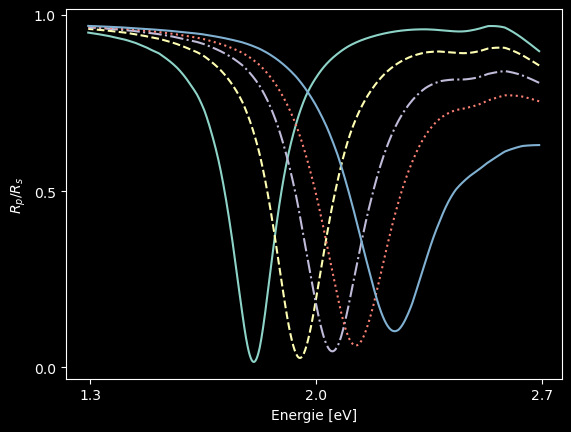

In [70]:
index_of_rad = [3, 5, 7, 9, 14]
lin = ['-', '--', '-.', ':', '-']
for i in range(len(index_of_rad)):
    plt.plot(lst_g_s[index_of_rad[i]]['E [ev]'], RpRs_au1[index_of_rad[i]],
            linestyle=lin[i],
           label=f'Rad: {round(radians[index_of_rad[i]], 3)}, Grad: {angles_deg[index_of_rad[i]]}')

# plt.plot(ao_p870['Energy [eV]'],RpRs_ao_870,label=f'angle: {87/2}, ao')
# plt.plot(ao_p880['Energy [eV]'],RpRs_ao_880,label=f'angle: {88/2}, ao')
# plt.plot(ao_p890['Energy [eV]'],RpRs_ao_890,label=f'angle: {89/2}, ao')
plt.xticks([1.3, 2.0, 2.7])
plt.yticks([0, 0.5, 1])
plt.xlabel('Energie [eV]')
plt.ylabel('$R_p/R_s$')
# plt.legend()
# plt.savefig('A1_spp.png', dpi=600, transparent=True)
# von links (blau) nach rechts: 43°, 43.5°, 44, 44.5, 45.75°
plt.show()

In [71]:
radians

array([0.73740161, 0.74176493, 0.74612826, 0.75049158, 0.7548549 ,
       0.75921822, 0.76358155, 0.76794487, 0.77230819, 0.77667152,
       0.78103484, 0.78539816, 0.78976149, 0.79412481, 0.79848813,
       0.80285146, 0.80721478])

In [ ]:
print(min(RpRs_au1[5]))
print(min(RpRs_ao_870))
print(abs(min(RpRs_au1[5]) - min(RpRs_ao_870)))

0.027067390175896638
0.019078941931568335
0.007988448244328303


In [73]:
print(min(RpRs_au1[7]))
print(min(RpRs_ao_880))
print(abs(min(RpRs_au1[7]) - min(RpRs_ao_880)))

0.045905245908631036
0.034237843209790855
0.01166740269884018


### Aufgabe 5

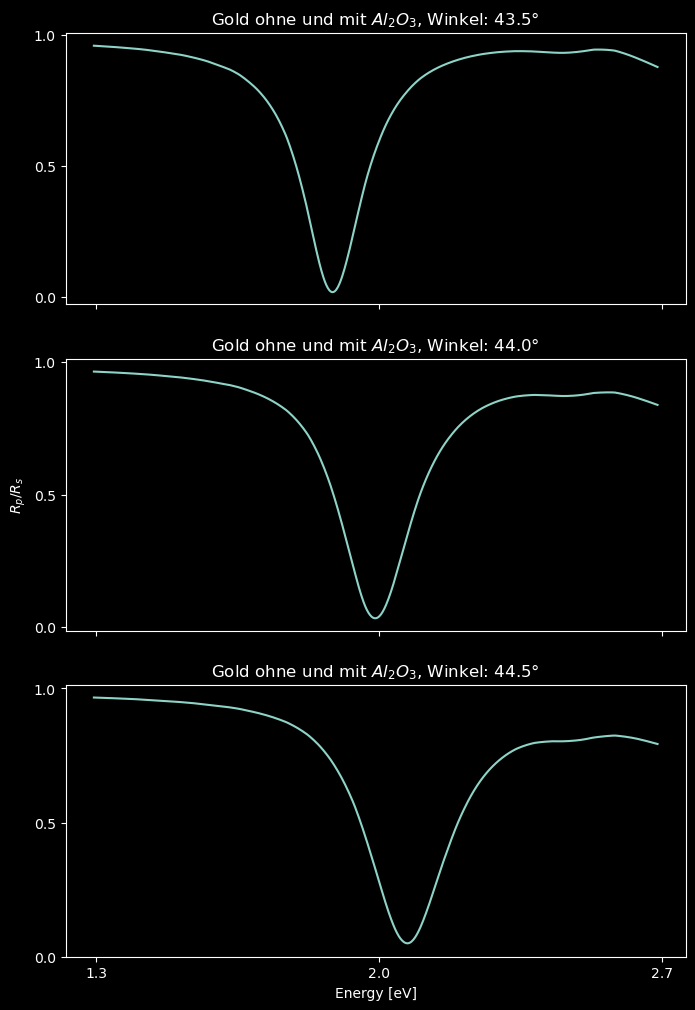

In [75]:
index_of_rad = [5, 7, 9]

fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
titles = ['Gold ohne und mit $Al_2O_3$, Winkel: 43.5°',
          'Gold ohne und mit $Al_2O_3$, Winkel: 44.0°',
          'Gold ohne und mit $Al_2O_3$, Winkel: 44.5°']

lst_ao_energy = [ao_p870['Energy [eV]'],
                 ao_p880['Energy [eV]'],
                 ao_p890['Energy [eV]']]
ao_rprs = [RpRs_ao_870, RpRs_ao_880, RpRs_ao_890]

# for i, ax in zip(index_of_rad, axs):
#     ax.plot(lst_g_s[i]['E [ev]'], RpRs_au1[i],'k--', label=f'ohne ao')
#     ax.plot(lst_ao_energy[i], ao_rprs[i], label=f'mit ao')
#     ax.set_yticks([0, 0.5, 1])
#     ax.legend()
for i in range(len(axs)):
    axs[i].set_title(titles[i])
    axs[i].plot(lst_g_s[index_of_rad[i]]['E [ev]'], RpRs_au1[index_of_rad[i]],
                'k--', label='ohne ao')
    axs[i].plot(lst_ao_energy[i], ao_rprs[i],
                label='mit ao')
    axs[i].set_yticks([0, 0.5, 1])
    # axs[i].legend()

axs[-1].set_xticks([1.3, 2.0, 2.7])
axs[-1].set_xlabel('Energy [eV]')
axs[1].set_ylabel('$R_p/R_s$')
# plt.savefig('A5_SPP.png',dpi=700,transparent=True)
plt.show()

## Calc 2

- Fresnel Equations,
- Zinth, p. 38,
- bib key: Zinth.2013
$$ \frac{r_P}{r_S} = \frac{n_t\cos(\theta_t)-n_e \cos(\theta_e)}{n_e \cos(\theta_e)-n_t\cos(\theta_t)}$$

In [77]:
def au_RpRs(wl, angle_in):
    # other parameter
    d_1 = 0.05 # Au layer height (um)
    k_0 = 2*np.pi/wl
    # n
    n_in = nBK7(wl)
    n_1 = nAu(wl)
    n_out = nAir(wl)
    # angles
    theta_in = angle_in
    theta_1 = np.arcsin(n_in/n_1 * np.sin(angle_in))
    theta_out = np.arcsin(n_1/n_out * np.sin(theta_1))
    # q
    q_in = np.cos(theta_in)/n_in
    q_1 = np.cos(theta_1)/n_1
    q_out = np.cos(theta_out)/n_out

    # Matrix elements
    m11 = np.cos(k_0*n_1*d_1*np.cos(theta_1))
    m12 = -1j*np.sin(k_0*n_1*d_1*np.cos(theta_1))*q_1
    m21 = -1j * np.sin(k_0*n_1*d_1*np.cos(theta_1))/q_1
    m22 = np.cos(k_0*n_1*d_1*np.cos(theta_1))
    # calculations of rp/rs
    t1 = ((m11+m12*q_out)*q_in - (m21+m22*q_out))
    t2 = ((m21+m22*q_out) - (m11+m12*q_out)*q_in)
    rp = (t1-t2)/(m11+m12*q_out)*q_in + (m21+m22*q_out)
    # print(rp)
    # rs = (t2 - t1)/(m11+m12*q_out)*q_in + (m21+m22*q_out)
    # print(rs)
    results = rp#/rs
    return abs(results)**2

In [78]:
def calc_lst(lst_wl,angle):
  lst = []
  for i in range(len(lst_wl)):
    x = au_RpRs(lst_wl[i],angle)
    lst.append(x)
  return np.array(lst)

In [79]:
RpRs_au = []
for i in range(17):
  x = calc_lst(lst_g_s[i]['wl [10^-6m]'],radians[i])
  RpRs_au.append(x)

In [80]:
print(len(RpRs_au[0]))

800


In [81]:
# RpRs_au[0]

### Plot

In [82]:
plt.plot(lst_g_s[0]['E [ev]'],RpRs_au[0],label=f'Rad: {round(radians[0],3)}')

In [83]:
index_of_rad = [5,7,9]
for i in index_of_rad:
  plt.plot(lst_g_s[i]['E [ev]'],RpRs_au[i],label=f'Rad: {round(radians[i],3)}')

# plt.xticks([1.3,2.0,2.7])
# plt.yticks([0,0.5,1])
plt.xlabel('Energie [eV]')
plt.ylabel('$R_p/R_s$')
plt.legend()

# Dispersion Relation

In [84]:
# gold, bib key: Johnson.1972, p. 4374
const_gold = pd.DataFrame({
    'eV': [0.64,0.77,0.89,1.02,1.14,1.26,1.39,1.51,1.64,1.76,
           1.88,2.01,2.13,2.26,2.38,2.50,2.63,2.75,2.88,3.00],
    'n': [0.92,0.56,0.43,0.35,0.27,.22,.17,.16,.14,.13,.14,0.21,
          .29,.43,.62,1.04,1.31,1.38,1.45,1.46],
    'k':[13.78,11.21,9.519,8.145,7.150,6.350,5.663,5.083,4.542,4.103,3.697,3.272,
         2.863,2.455,2.081,1.833,1.849,1.914,1.948,1.958],
    'dn':[.18,.08,.06,0.04,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,
          0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02],
    'dk':[0.65,0.30,0.17,0.1,0.07,0.05,0.03,0.025,0.015,0.01,0.007,
          0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007]
})

In [85]:
# both equation are from bib key: Johnson.1972, 4375
def wp_sq(N,m0):
  """
  N: density of the conduction electrons
  m0: mass of the conduction electrons
  """
  e = 1.6022e-19 # p.101, bibkey: Meyer.2014
  x = np.pi*4*N*e**2/(m0)
  return x

def e(omega,N,m0,tau):
  """
  N: density of the conduction electrons
  m0: mass of the conduction electrons
  tau: relaxation time
  """
  wpsq = wp_sq(N,m0)
  eps = 1-wpsq/(omega * (omega+ 1j /tau))
  return eps

# for gold:
m0 = 0.99 # electron mass
d_mo = 0.04
tau = 9.3e-15
d_tau = 0.9e-15

## Other data for gold

- TS: Tepmlate stripped
- photon wavelength range: $300nm- 25\mu m $
- url: https://journals.aps.org/prb/abstract/10.1103/PhysRevB.86.235147
- look at: 08.01.2024, 11:40am

In [88]:
# bib key: Olmon.2012

EP = 8.45 #ev, plasma energy
tau_d = 14 # fs
delta_tau = 3 #fs

data_git = 'https://raw.githubusercontent.com/Ben-physics-dotcom/Internships/refs/heads/main/FPR-1/Oberflaechenplasmonen/Olmon_PRB2012_TS.dat'

In [89]:
df_data_au = pd.read_csv(data_git,sep='\t') # read data
df_data_au = df_data_au.rename(columns={
    'Photon Energy': 'Energy [eV]',
    'Wavelength':'wl [m]'
}) # renaming two columns
df_data_au = df_data_au.iloc[1:] # drop not necessary rows
df_data_au.index = range(len(df_data_au)) # new index
for name in df_data_au.columns:
  df_data_au[name] = pd.to_numeric(df_data_au[name])

df_data_au['wl [um]'] = df_data_au['wl [m]']*1e6 # mycro meter = 10^-6
df_data_au = df_data_au.drop(['wl [m]'],axis=1)
print(f'length of df: {len(df_data_au)}')
df_data_au.head()

length of df: 459


,Energy [eV],ep1,ep2,n,k,wl [um]
0,4.133,-0.9627,6.448,1.667,1.934,0.30
1,3.999,-0.7975,6.661,1.719,1.937,0.31
2,3.874,-0.6126,6.736,1.754,1.921,0.32
3,3.757,-0.4686,6.698,1.767,1.895,0.33
4,3.647,-0.4070,6.581,1.759,1.871,0.34


In [90]:
print(complex(1,2))

(1+2j)


## equations

In [91]:
# omega as a function of lambda (wl)
def om(wl):
  c = 299792458 #m/s, bibkey: Meyer.2014, page: 97
  f = c/wl # 1/s, bib key: Meyer.2014, page 131
  w = 2*np.pi*f
  return w

# dielectric equation as a equation from omega
def eps_om(omega,tau):
  # bibkeys: Olmon.2012, Meyer.2014
  EP = 8.45 #ev, plasma energy
  wp = EP/(4.1357e-15/(2*np.pi))
  x = 1- wp**2/(complex(omega**2,omega/tau))
  return x

# dielectric equation as a equation from wl
def eps_wl(wl,tau):
  w = om(wl)
  wp = EP/(4.1357e-15/(2*np.pi))
  x = 1- wp**2/(complex(w**2,w/tau))
  return x

In [92]:
# dispersion relation
wp = EP/(4.1357e-15/(2*np.pi))
def k_x(om,eps1,eps2):
  """
  om: omega
  eps1: the dielectric material is real
  eps2: complex number of the mettal
  """
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  x = om/c * np.sqrt(np.real(eps1)*eps2/(np.real(eps1)+eps2))
  return x

def k_x1(om,eps1,eps2):
  """
  om: omega
  eps2: complex number of the mettal
  """
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  x = om/c * np.sqrt(eps1*eps2/(eps1+eps2))
  return x

def k_spp(omega,eps1):
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  wp = EP/(4.1357e-15/(2*np.pi))
  x = omega/c * np.sqrt(eps1*(omega**2-wp**2)/((1+eps1)*omega**2-wp**2))
  return x

def w_sp(eps1):
  wp = EP/(4.1357e-15/(2*np.pi))
  return wp/np.sqrt(1+eps1)

def w(k_x):
  wp = EP/(4.1357e-15/(2*np.pi))
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  return np.sqrt(wp**2+c**2*k_x**2)

def kx1(kx):
  """
  kx1: The real part of kx
  look at appendix c resolve for k_x'
  """
  return np.real(kx)

def kx2(kx):
  """
  kx2: The imaginary part of kx
  look at appendix c resolve for k_x''
  """
  return np.imag(kx)

def vp(omega,kx1):
  """
  kx1: the eal part of the dispersion relation
  """
  return omega/kx1

def delta_spp(kx2):
  """
  delta_spp: propagation length of the plasmon
  kx2: imaginary part of kx
  """
  return 1/(2*kx2)

In [93]:
def dis_air(wl):
  """
  dis_air: dispersion formula for air
  Temp: 15°C
  Pressure: 101325 Pa
  CO2: 450 ppm
  Bib Key: Ciddor.1996
  wavelength range: 0.23-1690 um, micro meter, 10^-6 meter
  """
  n = 1+ 0.05792105/(238.0185-wl**2)+ 0.00167917/(57.362-wl**2)
  return complex(n)

def eps_air(wl):
  x = dis_air(wl)
  return x**2

## Theory curves

In [94]:
def theo_w(k):
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  sqrt_eps = complex(1.000272620052918,0)#**2
  return k*c/sqrt_eps

def theo_w1(k,wp=EP/(4.1357e-15/(2*np.pi))):
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  return np.sqrt(wp**2+(c*k)**2)

c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


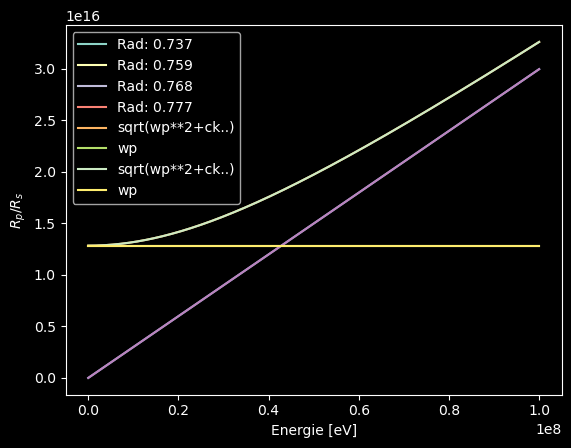

In [96]:
k = np.linspace(0.005,0.10e9,1000)
test = np.ones(1000)*EP/(4.1357e-15/(2*np.pi))
plt.plot(k,theo_w(k))
plt.plot(k,theo_w1(k),label='sqrt(wp**2+ck..)')
plt.plot(k,test,label='wp')
plt.legend()
plt.show()

## Plotting and calculations

In [97]:
lst_g_p[0].head()

,wl [nm],counts,wl [10^-6m],E [ev]
0,461.00433,345.0,0.461004,2.689780
1,461.62930,339.0,0.461629,2.686138
2,462.25427,347.0,0.462254,2.682506
3,462.87921,323.0,0.462879,2.678885
4,463.50415,338.0,0.463504,2.675273


In [98]:
lst_g_s[0].head()

,wl [nm],counts,wl [10^-6m],E [ev]
0,461.00433,307.0,0.461004,2.689780
1,461.62930,318.0,0.461629,2.686138
2,462.25427,315.0,0.462254,2.682506
3,462.87921,314.0,0.462879,2.678885
4,463.50415,327.0,0.463504,2.675273


In [99]:
type(lst_g_s[0]['wl [nm]'][0])

numpy.float64

In [100]:
print(len(lst_g_s))

17


### Calculations

In [101]:
om_au_p = []
om_au_s = []
eps_air_p = []
eps_air_s = []

for i in range(len(lst_g_p)):
  # omega
  x = om(lst_g_p[i]['wl [nm]']*1e-9)
  y = om(lst_g_s[i]['wl [nm]']*1e-9)

  # eps 1
  v = []
  w = []
  for j in range(len(lst_g_p[i]['wl [nm]'])):
    s = eps_air(lst_g_p[i]['wl [nm]'][j]*1e-9)
    t = eps_air(lst_g_s[i]['wl [nm]'][j]*1e-9)
    v.append(np.array(s))
    w.append(np.array(t))


  om_au_p.append(np.array(x))
  om_au_s.append(np.array(y))
  eps_air_p.append(np.array(v))
  eps_air_s.append(np.array(w))

om_au_p = np.array(om_au_p)
om_au_s = np.array(om_au_s)

eps_air_p = np.array(eps_air_p)
eps_air_s = np.array(eps_air_s)

kx_au_p = []
kx_au_s = []

for i in range(len(om_au_s)):
  x = k_spp(om_au_p[i],eps_air_p[i])
  y = k_spp(om_au_s[i],eps_air_s[i])
  # print(x.head())

  kx_au_p.append(x)
  kx_au_s.append(y)

In [102]:
om_au_p/om_au_s

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [103]:
# kx_au_p

In [104]:
def om_wp(k_x):
  wp = EP/(4.1357e-15/(2*np.pi))
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  return np.sqrt(wp**2+c**2*k_x**2)

def om_grap(k_x):
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  return c*k_x

In [105]:
au_om_wp_p = []
au_om_wp_s = []
au_om_grap_p = []
au_om_grap_s = []

for i in range(len(kx_au_s)):
  x = om_wp(kx_au_p[i])
  y = om_wp(kx_au_s[i])
  s = om_grap(kx_au_p[i])
  t = om_grap(kx_au_s[i])

  au_om_wp_p.append(x)
  au_om_wp_s.append(y)
  au_om_grap_p.append(s)
  au_om_grap_s.append(t)


In [106]:
len(kx_au_s)

17

In [107]:
print(len(kx_au_p[0]))
print(len(au_om_grap_p[0]))

800
800


### Plots

In [108]:
plt.plot(np.real(kx_au_p[0]),np.real(au_om_grap_p[0]))
# plt.plot(np.real(kx_au_p[0]),np.imag(au_om_grap_p[0]))

k = np.linspace(0.005,0.10e9,1000)
test = np.ones(1000)*EP/(4.1357e-15/(2*np.pi))
plt.plot(k,theo_w(k),label='theo')
plt.plot(k,theo_w1(k),label='sqrt(wp**2+ck..)')
plt.plot(k,test,label='wp')
plt.legend()

c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [109]:
k = np.linspace(0.005,0.05e9,1000)
test = np.ones(1000)*EP/(4.1357e-15/(2*np.pi))
plt.plot(k,theo_w(k),'g--',linewidth=2,label='theo')
plt.plot(k,theo_w1(k),'k--',linewidth=2,label='sqrt(wp**2+ck..)')
plt.plot(k,test,'--',linewidth=2,label='wp')
plt.plot(np.real(kx_au_s[11]),np.real(au_om_wp_s[11]),
         label='s-Polarisation',linewidth=4,c='r')
plt.plot(np.real(kx_au_p[11]),np.real(au_om_grap_p[0]),
         label='p-Polarisation',linewidth=4,color='k')
plt.legend()
plt.xlabel('k')
plt.ylabel('$\omega$')

<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\o'
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\1258966556.py:12: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega$')


Text(42.597222222222214, 0.5, '$\\omega$')

In [110]:
k = np.linspace(0.005,0.05e9,1000)
test = np.ones(1000)*EP/(4.1357e-15/(2*np.pi))
plt.plot(k,theo_w(k),'g--',linewidth=2,label='theo')
plt.plot(k,theo_w1(k),'k--',linewidth=2,label='sqrt(wp**2+ck..)')
plt.plot(k,test,'--',linewidth=2,label='wp')
for i in range(len(kx_au_s)):
  plt.plot(np.real(kx_au_s[i]),np.real(au_om_wp_s[i]),
         label='s-Polarisation',linewidth=4,c='r')
  plt.plot(np.real(kx_au_p[i]),np.real(au_om_grap_p[i]),
         label='p-Polarisation',linewidth=4,color='k')
# plt.legend()
plt.xlabel('k')
plt.ylabel('$\omega$')

<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\1061610041.py:13: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega$')


Text(42.597222222222214, 0.5, '$\\omega$')

## Looking for differences:

In [111]:
# lst_g_p

In [112]:
print(len(lst_g_p[0]))
print(lst_g_p[0])

800
       wl [nm]  counts  wl [10^-6m]    E [ev]
0    461.00433   345.0     0.461004  2.689780
1    461.62930   339.0     0.461629  2.686138
2    462.25427   347.0     0.462254  2.682506
3    462.87921   323.0     0.462879  2.678885
4    463.50415   338.0     0.463504  2.675273
..         ...     ...          ...       ...
795  956.03082  9223.0     0.956031  1.297029
796  956.64929  8684.0     0.956649  1.296191
797  957.26776  8378.0     0.957268  1.295353
798  957.88617  8475.0     0.957886  1.294517
799  958.50464  8762.0     0.958505  1.293682

[800 rows x 4 columns]


In [113]:
nAu(lst_g_p[0]['wl [10^-6m]'][1])**2

np.complex128(-1.617457295627832+5.543454376159338j)

In [114]:
# Calculation of gold eps
eps_au_p = []
eps_au_s = []
for i in range(len(lst_g_p)):
  p = []
  s = []
  for j in range(len(lst_g_p[i])):
    pp = nAu(lst_g_p[i]['wl [10^-6m]'][j])**2
    ss = nAu(lst_g_s[i]['wl [10^-6m]'][j])**2
    p.append(pp)
    s.append(ss)

  eps_au_p.append(np.array(p))
  eps_au_s.append(np.array(s))

In [115]:
lst_sqrt_eps_air = []
for i in range(len(eps_air_p)):
  x = np.sqrt(eps_air_p[i][0])
  lst_sqrt_eps_air.append(x)
# lst_sqrt_eps_air

In [116]:
# np.sqrt(eps_air_p[1])

In [117]:
k_spp_s_pol = []
k_spp_p_pol = []
k_x_s_pol = []
k_x_p_pol = []
k_x1_s_pol = []
k_x1_p_pol = []

for i in range(len(om_au_s)):
  x = k_spp(om_au_p[i],eps_air_p[i])
  y = k_spp(om_au_s[i],eps_air_s[i])
  v = k_x(om_au_s[i],eps_au_p[i],eps_air_s[i])
  w = k_x(om_au_s[i],eps_au_s[i],eps_air_p[i])
  v1 = k_x1(om_au_s[i],eps_au_p[i],eps_air_s[i])
  w1 = k_x1(om_au_s[i],eps_au_s[i],eps_air_p[i])
  # print(x.head())

  k_spp_p_pol.append(x)
  k_spp_s_pol.append(y)
  k_x_s_pol.append(v)
  k_x_p_pol.append(w)
  k_x1_s_pol.append(v1)
  k_x1_p_pol.append(w1)

### Plots

In [118]:
eps1 = nAir(lst_g_s[3]['wl [10^-6m]'])**2
eps2 = nAu(lst_g_s[3]['wl [10^-6m]'])**2

In [119]:
def theo_kx(k,eps1,eps2):
  c =   299792458
  return c*k*np.sqrt((eps1+eps2)/(eps1*eps2))

In [120]:
def theo_om1(k,l1):
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  eps1 = (np.real(nAir(l1)))**2
  eps2 = nAu(l1)**2
  r1 = k*c*np.sqrt((eps1+eps2)/(eps1*eps2))
  # r2 = om(l2)/c*np.sqrt(eps1*eps2/(eps1+eps2))
  return r1

In [121]:
c =  299792458

In [122]:
wp_sp = wp/np.sqrt(1+np.real(eps1))
wp_sp1 = wp/np.sqrt(2)
# wp_sp2 = np/np.sqrt(1+np.real(eps2))
wp_sp

np.float64(9077631556311674.0)

In [123]:
test1 = np.ones(1000) * wp_sp
test2 = np.ones(1000) * wp_sp1
c

299792458

In [124]:
om_2 = np.sqrt(wp**2+c**2*k**2)
k800 = np.linspace(0,0.7e8,800)
k = np.linspace(0,0.7e8,1000)

In [125]:
test = np.ones(1000)*EP/(4.1357e-15/(2*np.pi))
plt.plot(k,np.real(theo_w(k)),'g--',linewidth=2,label='theo')
plt.plot(k,test,'--',label='wp')
plt.plot(k,test1,'--')
plt.plot(k,om_2,'--m')
plt.plot(np.real(k_x_s_pol[0]),om_au_p[0],'r',linewidth=3)
plt.plot(np.real(k_spp_s_pol[0]),om_au_p[0],'k',linewidth=3)
# plt.plot(k800,c*np.real(k_x_s_pol[0])*np.real(np.sqrt((eps1+eps2)/(eps1*eps2))))
# plt.legend()
plt.xlabel('k [1/m]')
plt.ylabel('$\omega$ [Hz]')
# plt.savefig('A23-V2.png',dpi=600,transparent=True)

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\1926346989.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega$ [Hz]')


Text(42.597222222222214, 0.5, '$\\omega$ [Hz]')

In [126]:
for i in range(17):
  plt.plot(np.real(k_x_s_pol[i]),om_au_p[i],'r',linewidth=3)
  plt.plot(np.real(k_spp_s_pol[i]),om_au_p[i],'k',linewidth=3)


### Regression

In [127]:
# x = sm.add_constant(np.real(k_spp_s_pol[0]))
x1= sm.add_constant(k)
# y = om_au_p[0]
y1 = np.real(theo_w(k))
# model = sm.OLS(y,x).fit()
model1 = sm.OLS(y1,x1).fit()
# print(model.summary())
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.147e+33
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:18:19   Log-Likelihood:                -3151.5
No. Observations:                1000   AIC:                             6307.
Df Residuals:                     998   BIC:                             6317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0703      0.358    -11.378      0.0

In [128]:
x = sm.add_constant(np.real(k_spp_s_pol[0]))
# x1= sm.add_constant(k)
y = om_au_p[0]
# y1 = theo_w(k)
model = sm.OLS(y,x).fit()
# model1 = sm.OLS(y1,x1).fit()
print(model.summary())
# print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.144e+06
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:18:20   Log-Likelihood:                -25188.
No. Observations:                 800   AIC:                         5.038e+04
Df Residuals:                     798   BIC:                         5.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.684e+14   1.82e+12     92.415      0.0

## Test zu eps2

In [129]:
gamma = 1/14e-14
def eps_2_v2(oms):
  result = 1- wp**2/(oms**2+1j*gamma*oms)
  return result

In [130]:
def th(k,wl):
  faktor = c*k
  oms = om(wl)
  eps22 = eps_2_v2(oms)
  eps1 = nAir(wl)
  return faktor*np.real(np.sqrt((eps1+eps22)/(eps1*eps22)))

In [131]:
lst_g_p[0].head()

,wl [nm],counts,wl [10^-6m],E [ev]
0,461.00433,345.0,0.461004,2.689780
1,461.62930,339.0,0.461629,2.686138
2,462.25427,347.0,0.462254,2.682506
3,462.87921,323.0,0.462879,2.678885
4,463.50415,338.0,0.463504,2.675273


In [132]:
theory = th(k800,lst_g_p[0]['wl [10^-6m]'])


In [133]:
om_2 = np.sqrt(wp**2+c**2*k**2)
k800 = np.linspace(0,0.7e8,800)
k = np.linspace(0,0.7e8,1000)

In [134]:
test = np.ones(1000)*EP/(4.1357e-15/(2*np.pi))
plt.plot(k,np.real(theo_w(k)),'g--',linewidth=2,label='theo')
plt.plot(k,test,'--',label='wp')
plt.plot(k,test1,'--')
plt.plot(k,om_2,'--m')
plt.plot(np.real(k_x_s_pol[0]),om_au_p[0],'r',linewidth=3)
plt.plot(np.real(k_spp_s_pol[0]),om_au_p[0],'k',linewidth=3)
# plt.plot(k800,theory)

plt.xlabel('k [1/m]')
plt.ylabel('$\omega$ [Hz]')
# plt.savefig('A23-V2.png',dpi=600,transparent=True)

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\3395932131.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega$ [Hz]')


Text(42.597222222222214, 0.5, '$\\omega$ [Hz]')

# Dispersion relation the second

## equations:
Dispersion realtion
$$ k_x = k_{spp} = \frac{\omega}{c}\sqrt{\frac{\epsilon_1(\omega^2-\omega_P^2)}{(1+\epsilon_1)\cdot \omega^2-\omega_p^2}} $$

In [135]:
def kx(wl,eps1):
  c = 299792458 #m/s, bibkey: Meyer.2014, page: 97
  # bibkeys: Olmon.2012, Meyer.2014
  EP = 8.45 #ev, plasma energy
  wp = EP/(4.1357e-15/(2*np.pi))
  oms = om(wl)
  sqrt_part = np.sqrt(eps1*(oms**2-wp**2)/((1+eps1)*oms**2-wp**2))
  return oms*sqrt_part/c


def om(wl):
  c = 299792458 #m/s, bibkey: Meyer.2014, page: 97
  f = c/wl # 1/s, bib key: Meyer.2014, page 131
  w = 2*np.pi*f
  return w

In [136]:
wp = EP/(4.1357e-15/(2*np.pi))

In [137]:
lst_g_p[0].head()

,wl [nm],counts,wl [10^-6m],E [ev]
0,461.00433,345.0,0.461004,2.689780
1,461.62930,339.0,0.461629,2.686138
2,462.25427,347.0,0.462254,2.682506
3,462.87921,323.0,0.462879,2.678885
4,463.50415,338.0,0.463504,2.675273


In [138]:
eps1 = nAir(lst_g_s[3]['wl [10^-6m]'])**2
eps2 = nAu(lst_g_s[3]['wl [10^-6m]'])**2

In [139]:
c = 299792458
k = np.linspace(0.5e7,1.5e8,1000)
omeg = om(lst_g_s[3]['wl [10^-6m]'])
EP = 8.45 #ev, plasma energy
wp = EP/(4.1357e-15/(2*np.pi))

kx = omeg/c * np.sqrt(eps1*(omeg**2-wp**2)/((1+eps1)*omeg**2+wp**2))
dashed = c*k/np.sqrt(np.real(eps1))
theorie1 = c*abs(kx)*abs(np.sqrt((eps1+eps2)/(eps1*eps2)))

In [140]:
# test_k = kx(lst_g_s[3]['wl [10^-6m]'])#*1e-6,1)
# test_om = om(lst_g_s[3]['wl [10^-6m]'])#*1e-6)
# print(test_k[2])
# k2 = np.linspace(0.5e7,1.5e8,800)
# t1 = np.sqrt(wp**2+299792458**2*k**2)
# t2 = 299792458*k
# # t3 = 299792458*k * np.sqrt

# # first try:
# # plt.plot(test_k,test_om,label='test')
# # plt.plot(k,t1,label='$\sqrt{w_p^2+c^2k^2}$')
# # plt.plot(k,t2,label='$c\cdot k_x$')

# # second try:
# plt.plot(k,dashed,'--',label='$\sqrt{w_p^2+c^2k^2}$')
# plt.plot(k2,theorie1)

# plt.legend()

# Dielectric Functions

## Values and Equations

In [141]:
tau = 14e-15 #  bibkeys: Olmon.2012

In [142]:
def epsilon(om,tau=14e-15,eps_inf=1):
  # bibkeys: Olmon.2012, Meyer.2014
  EP = 8.45 #ev, plasma energy
  wp = EP/(4.1357e-15/(2*np.pi))
  gamma = 1/tau
  result = eps_inf-wp**2/complex(om**2,gamma*om)
  return result

## p-polarization

In [143]:
lst_g_p[0].head()

,wl [nm],counts,wl [10^-6m],E [ev]
0,461.00433,345.0,0.461004,2.689780
1,461.62930,339.0,0.461629,2.686138
2,462.25427,347.0,0.462254,2.682506
3,462.87921,323.0,0.462879,2.678885
4,463.50415,338.0,0.463504,2.675273


In [144]:
for i in range(17):
  x_om = om(lst_g_p[i]['wl [10^-6m]'])
  y_eps = []
  for j in range(len(lst_g_p[i]['wl [10^-6m]'])):
    y = epsilon(x_om[j])
    y_eps.append(y)
  y_eps=np.array(y_eps)
  plt.plot(x_om,abs(y_eps))

In [145]:
for i in range(17):
  x_om = om(lst_g_p[i]['wl [10^-6m]'])
  y_eps = []
  for j in range(len(lst_g_p[i]['wl [10^-6m]'])):
    y = epsilon(x_om[j])
    y_eps.append(y)
  y_eps=np.array(y_eps)
  plt.plot(x_om,np.real(y_eps),label='Re(eps($\omega$))')
  # plt.yticks([round(min(np.real(y_eps)),1),round(max(np.real(y_eps)),1)])
  # plt.plot(x_om,np.imag(y_eps),label='Im(eps($\omega$))')
  # plt.legend()

<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\4075708930.py:8: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(x_om,np.real(y_eps),label='Re(eps($\omega$))')


In [146]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

for i in range(17):
    x_om = om(lst_g_p[i]['wl [10^-6m]'])
    y_eps = [epsilon(x) for x in x_om]
    y_eps = np.array(y_eps)

    # Plot real part in the first subplot
    axs[0].plot(x_om, np.real(y_eps), label=f'Re(eps($\omega$)) - {i}')
    # print((y_eps[700]))
    # Plot imaginary part in the second subplot
    axs[1].plot(x_om, np.imag(y_eps), label=f'Im(eps($\omega$)) - {i}')

# Set common x-axis label
plt.xlabel('$\omega$')
plt.ylabel('$\epsilon(\omega)$')
# Add legends
# axs[0].legend()
# axs[1].legend()
plt.savefig('A3-p_polarisation.png',dpi=600,transparent=True)

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\e'
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\2719908143.py:10: SyntaxWarning: invalid escape sequence '\o'
  axs[0].plot(x_om, np.real(y_eps), label=f'Re(eps($\omega$)) - {i}')
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\2719908143.py:13: SyntaxWarning: invalid escape sequence '\o'
  axs[1].plot(x_om, np.imag(y_eps), label=f'Im(eps($\omega$)) - {i}')
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\2719908143.py:16: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\omega$')
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\2719908143.py:17: SyntaxWarning: invalid 

## s-polarisation

In [147]:
for i in range(17):
  x_om = om(lst_g_s[i]['wl [10^-6m]'])
  y_eps = []
  for j in range(len(lst_g_s[i]['wl [10^-6m]'])):
    y = epsilon(x_om[j])
    y_eps.append(y)
  y_eps=np.array(y_eps)
  plt.plot(x_om,abs(y_eps))

In [148]:
eps_1_plot = np.ones(len(lst_g_s[0]['wl [10^-6m]']))

In [149]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

for i in range(1):
    x_om = om(lst_g_s[i]['wl [10^-6m]'])
    y_eps = [epsilon(x) for x in x_om]
    y_eps = np.array(y_eps)

    # Plot real part in the first subplot
    axs[0].plot(x_om, np.real(y_eps),'r', label=f'Re(eps($\omega$))')
    axs[0].plot(x_om, eps_1_plot, 'g',
                label=f'$Re(\epsilon_1)=1$'
                )
    # print((y_eps[700]))
    # Plot imaginary part in the second subplot
    axs[1].plot(x_om, np.imag(y_eps),c='r', label=f'Im(eps($\omega$))')
    axs[1].plot(x_om, eps_1_plot*0, 'g',
                label=f'$Im(\epsilon_1)=0$'
                )

# Set titles
axs[0].set_title('Real Part')
axs[0].set_yticks([0,-10000,-20000,-30000])
axs[1].set_title('Imaginary Part')

# Set y-label for the first subplot
axs[0].set_ylabel('$\epsilon(\omega)$')
axs[1].set_ylabel('$\epsilon(\omega)$')
# Set common x-axis label
plt.xlabel('$\omega$')
# Add legends
axs[0].legend()
axs[1].legend()
plt.savefig('A3-s_polarisation.png',dpi=600,transparent=True)

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:27: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:30: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:27: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:30: SyntaxWarning: invalid escape sequence '\o'
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\3520938613.py:10: SyntaxWarning: invalid escape sequence '\o'
  axs[0].plot(x_om, np.real(y_eps),'r', label=f'Re(eps($\omega$))')
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\3520938613.py:12: SyntaxWarning: invalid escape sequence

In [150]:
x_om = om(lst_g_s[0]['wl [10^-6m]'])
y_eps = [epsilon(x) for x in x_om]
y_eps = np.array(y_eps)

# Plot real part in the first subplot
plt.plot(x_om, np.abs(y_eps), label=f'Re(eps($\omega$)) - {i}')
plt.plot(x_om, eps_1_plot,
                label=f'$Re(\epsilon_1)=1$'
                )

<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\e'
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\1359325225.py:6: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(x_om, np.abs(y_eps), label=f'Re(eps($\omega$)) - {i}')
C:\Users\benjf\AppData\Local\Temp\ipykernel_21476\1359325225.py:8: SyntaxWarning: invalid escape sequence '\e'
  label=f'$Re(\epsilon_1)=1$'


## Plotting p-/s-Polarization Delectric function in one plot

# Dispersion relation the third

In [151]:
def eps_3(wl):
  tau = 14e-15
  gamma = 1/tau
  omega = om(wl)
  return 1-wp**2/(complex(omega**2,gamma*omega))

In [152]:
wl = np.array(lst_g_p[0]['wl [10^-6m]'])
oms = om(wl)
espilon = []
for i in wl:
  x = eps_3(i)
  espilon.append(x)

esp = np.array(espilon)

In [153]:
# oms

In [154]:
print()

In [155]:
plt.plot(oms,np.imag(esp))

# Phase velocity and penetration depth

- phase velocity:
$$ v_p = \frac{\omega}{k_x'} $$
- penetration depth:
$$ z_j = \frac{1}{|k_{jz}|} $$
- kjz
$$ k_{jz}^2 = \frac{\omega^2}{c^2} \frac{\epsilon_j^2}{\epsilon_1+\epsilon_2}$$

In [156]:
def vp(wl,kx):
  """
  vp: phase velocity
  """
  kx_1 = np.real(kx)
  omeg = om(wl)
  return omeg/kx_1

def zj(kjz):
  """
  zj: penetration depth
  """
  return 1/abs(kjz)

def k12z(wl):
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  # for gold:
  eps1 = nAu(wl)**2
  # for Al2O3:
  eps2 = nAl2O3(wl)**2
  # calculations
  omeg = om(wl) # omega
  factor = omeg/c
  result1 = factor**2 * eps1**2/(eps1+eps2)
  result2 = factor**2 * eps2**2/(eps1+ eps2)
  return np.sqrt(result1), np.sqrt(result2)

In [157]:
ao_p870.head()

,wl [10^-9m],Counts,wl [10^-6m],Energy [eV]
0,461.00433,249.0,0.461004,2.689780
1,461.62930,254.0,0.461629,2.686138
2,462.25427,259.0,0.462254,2.682506
3,462.87921,256.0,0.462879,2.678885
4,463.50415,267.0,0.463504,2.675273


## calculating kjz's

In [158]:
k1z_870 = []
k2z_870 = []
k1z_880 = []
k2z_880 = []
k1z_890 = []
k2z_890 = []

for i in range(len(ao_p870)):
  k1z87, k2z87 = k12z(ao_p870['wl [10^-6m]'][i])
  k1z88, k2z88 = k12z(ao_p880['wl [10^-6m]'][i])
  k1z89, k2z89 = k12z(ao_p890['wl [10^-6m]'][i])

  k1z_870.append(k1z87)
  k2z_870.append(k2z87)
  k1z_880.append(k1z88)
  k2z_880.append(k2z88)
  k1z_890.append(k1z89)
  k2z_890.append(k2z89)

k1z_870 = np.array(k1z_870)
k2z_870 = np.array(k2z_870)
k1z_880 = np.array(k1z_880)
k2z_880 = np.array(k2z_880)
k1z_890 = np.array(k1z_890)
k2z_890 = np.array(k2z_890)
lst_kjz = [k1z_870,k2z_870,k1z_880,k2z_880,k1z_890,k2z_890]

## Calculating the penetration depth:

In [159]:
lst_depth = []
for i in range(len(lst_kjz)):
  lst = []
  for j in range(len(lst_kjz[i])):
    x = lst_kjz[i]
    y = zj(x)
    lst.append(y)

  lst_depth.append(lst)

## calculating the phase velocity

In [160]:
def kx_v2(wl):
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  # for gold:
  eps1 = nAu(wl)**2
  # for Al2O3:
  eps2 = nAl2O3(wl)**2
  # calculations
  omeg = om(wl) # omega
  factor = omeg/c
  kx =  factor**2 *eps1*eps2/(eps1+eps2)
  return np.sqrt(kx)

def vp_v2(wl):
  c =  299792458 #m/s, bibkey: Meyer.2014, page: 97
  omeg = om(wl) # omega
  kx = kx_v2(wl)
  kx1 = np.real(kx)
  return omeg/kx1

## plots

# Used Data in files

In [161]:
wl = np.array(lst_g_s[0]['wl [10^-6m]'])
omega = om(wl)
E = 1.240/wl

In [162]:
eps_luft = np.sqrt(nAir(wl))
eps_gold = np.sqrt(nAu(wl))
n_Luft = nAir(wl)
n_gold = nAu(wl)
n_Bk7 = []
n_al = []
for i in range(len(wl)):
  x = nBK7(wl[i])
  y = nAl2O3(wl[i])
  n_Bk7.append(x)
  n_al.append(y)
n_Bk7 = np.array(n_Bk7)
n_al = np.array(n_al)

In [163]:
# lambda, omega, Energy
df = pd.DataFrame(
    {
        'wl [10^-6m]': wl,
        'omega [10^9Hz]':omega/1e9,
        'Energy [eV]':E,
        'Brechungsindex Luft':n_Luft,
        'Brechungsindex Gold': n_gold,
        'Brechungsindex Al2O3': n_al,
        'Brechungsindex BK7': n_Bk7,
        'dielectric constant air':np.sqrt(n_Luft),
        'dielectric constant Gold':np.sqrt(n_gold)
    }
)

In [164]:
df.head()

,wl [10^-6m],omega [10^9Hz],Energy [eV],Brechungsindex Luft,Brechungsindex Gold,Brechungsindex Al2O3,Brechungsindex BK7,dielectric constant air,dielectric constant Gold
0,0.461004,4.085974,2.689780,1.0+0.0j,1.446930+1.924834j,1.778156+0.000000j,1.524348+0.000000j,1.0+0.0j,1.388336+0.693216j
1,0.461629,4.080442,2.686138,1.0+0.0j,1.441726+1.922506j,1.778087+0.000000j,1.524295+0.000000j,1.0+0.0j,1.386500+0.693295j
2,0.462254,4.074925,2.682506,1.0+0.0j,1.436522+1.920178j,1.778018+0.000000j,1.524242+0.000000j,1.0+0.0j,1.384662+0.693374j
3,0.462879,4.069424,2.678885,1.0+0.0j,1.431319+1.917850j,1.777949+0.000000j,1.524189+0.000000j,1.0+0.0j,1.382823+0.693455j
4,0.463504,4.063937,2.675273,1.0+0.0j,1.426115+1.915523j,1.777881+0.000000j,1.524137+0.000000j,1.0+0.0j,1.380981+0.693537j


In [165]:
df.tail()

,wl [10^-6m],omega [10^9Hz],Energy [eV],Brechungsindex Luft,Brechungsindex Gold,Brechungsindex Al2O3,Brechungsindex BK7,dielectric constant air,dielectric constant Gold
795,0.956031,1.970283,1.297029,1.0+0.0j,0.202204+6.470760j,1.756596+0.000000j,1.508134+0.000000j,1.0+0.0j,1.827036+1.770835j
796,0.956649,1.969010,1.296191,1.0+0.0j,0.202373+6.475689j,1.756583+0.000000j,1.508125+0.000000j,1.0+0.0j,1.827734+1.771507j
797,0.957268,1.967737,1.295353,1.0+0.0j,0.202543+6.480618j,1.756571+0.000000j,1.508116+0.000000j,1.0+0.0j,1.828432+1.772179j
798,0.957886,1.966467,1.294517,1.0+0.0j,0.202712+6.485546j,1.756558+0.000000j,1.508106+0.000000j,1.0+0.0j,1.829129+1.772851j
799,0.958505,1.965198,1.293682,1.0+0.0j,0.202882+6.490475j,1.756546+0.000000j,1.508097+0.000000j,1.0+0.0j,1.829826+1.773522j


In [167]:
# df.to_csv('Wl-Om-Energy.csv')